## Individual Project - Fixed Income Securities

Fernando Reis nº20231535

In [99]:
!pip install quantlib
!pip install jpype1


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\tiago\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [100]:
import QuantLib as ql
import numpy as np
import pandas as pd

In [101]:
def count_days(d1: ql.Date, d2: ql.Date, basis = ql.Actual360()):
    return basis.dayCount(d1, d2) -1

def count_years(d1: ql.Date, d2: ql.Date, basis = ql.Actual360()):
    return basis.yearFraction(d1, d2) 

def get_coupon_dates(issue_date:ql.Date, maturity_date: ql.Date, frequency: int):
    schedule = ql.Schedule(
        issue_date, 
        maturity_date, 
        ql.Period(frequency),
        ql.TARGET(),
        ql.Following,
        ql.Following,
        ql.DateGeneration.Backward, 
        False
    )
    return [dt for dt in schedule][1:]

#### Consider the Bloomberg reference EUR yield curve on the valuation date 14-04-2019 as detailed below. Based on the market information:

In [102]:
data = {
    "maturity": [
        "15/04/2019", "23/04/2019", "16/05/2019", "16/07/2019", "16/10/2019",
        "16/04/2020", "16/10/2020", "16/04/2021", "19/04/2022", "17/04/2023",
        "16/04/2024", "16/04/2025", "16/04/2026", "16/04/2027", "18/04/2028",
        "16/04/2029", "16/04/2030", "16/04/2031", "17/04/2034", "18/04/2039",
        "19/04/2044", "20/04/2049", "16/04/2054", "16/04/2059", "16/04/2064",
        "16/04/2069"
    ],
    "rate": [
        -0.36400, -0.37800, -0.36700, -0.31000, -0.23200, -0.22700, -0.19100,
        -0.19925, -0.13050, -0.03975, 0.05525, 0.15425, 0.25650, 0.35725, 0.45825,
        0.55240, 0.63850, 0.71650, 0.90100, 1.07100, 1.13400, 1.15200, 1.15000,
        1.140249, 1.13100, 1.120999
    ]
}

yield_curve_df = pd.DataFrame(data)

valuation_date = ql.Date(14,4,2019)

yield_curve_df['maturity'] = yield_curve_df['maturity'] \
    .apply(lambda d: pd.to_datetime(d, infer_datetime_format=True)) \
    .apply(lambda d: ql.Date(d.day, d.month, d.year))

yield_curve_df['rate'] = yield_curve_df['rate'].apply(lambda r: r/100)


yield_curve_df['theta'] = yield_curve_df['maturity'] \
    .apply(lambda maturity: count_years(valuation_date, maturity))

yield_curve_df

C:\Users\tiago\AppData\Local\Temp\ipykernel_21232\1729480850.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  .apply(lambda d: pd.to_datetime(d, infer_datetime_format=True)) \
C:\Users\tiago\AppData\Local\Temp\ipykernel_21232\1729480850.py:23: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .apply(lambda d: pd.to_datetime(d, infer_datetime_format=True)) \


,maturity,rate,theta
0,"April 15th, 2019",-0.003640,0.002778
1,"April 23rd, 2019",-0.003780,0.025000
2,"May 16th, 2019",-0.003670,0.088889
3,"July 16th, 2019",-0.003100,0.258333
4,"October 16th, 2019",-0.002320,0.513889
5,"April 16th, 2020",-0.002270,1.022222
6,"October 16th, 2020",-0.001910,1.530556
7,"April 16th, 2021",-0.001992,2.036111
8,"April 19th, 2022",-0.001305,3.058333
9,"April 17th, 2023",-0.000398,4.066667


## a) Build the complete yield curve using interpolation techniques.

### Cubic Spline interpolation

In [103]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

#cubic spline the yield curve
yield_curve = CubicSpline(yield_curve_df.theta, yield_curve_df.rate, bc_type='not-a-knot')

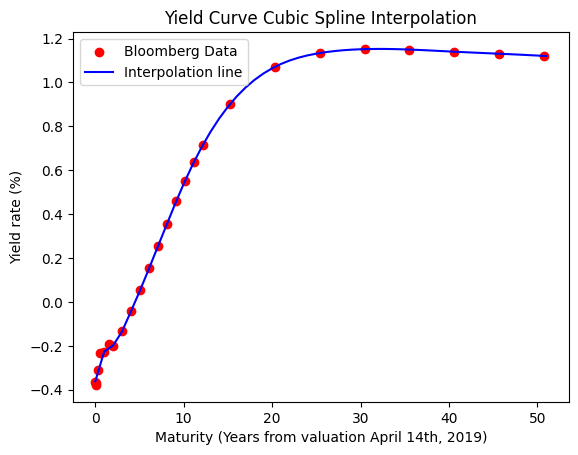

In [104]:
time_axis = np.arange(0, max(yield_curve_df.theta)+1)
rate_axis = yield_curve(time_axis)

plt.scatter(yield_curve_df.theta, yield_curve_df.rate * 100, label='Bloomberg Data', color='red');
plt.plot(time_axis, rate_axis * 100, label='Interpolation line', color='blue');
plt.xlabel(f'Maturity (Years from valuation {valuation_date})')
plt.ylabel('Yield rate (%)')
plt.title('Yield Curve Cubic Spline Interpolation')
plt.legend()
plt.show()

### b) Compute the accrued interest in the fixed and floating legs of the contract.

We assume T+0 lag on settlement date (settlement date = trade date) and notional value of 10 million euros. We can start by defining common vars:

#### Set the assumptions

In [105]:
settlement_date = ql.Date(15, 4, 2019)
issue_date = ql.Date(19,1, 2007)
maturity_date = ql.Date(19, 1, 2032)
notional_value = 10e6

#swap rate = fixed leg rate
#swap rate != swap par rate
swap_rate = fixed_rate = 0.05982 / 100

Fixed Leg

In [106]:
#we actually exclude the first coupon, because it's a short first coupon since we settled at 15/4/2019
#and first coupon after settlement is at 20/1/2019
fixed_leg_coupon_dates = [
    date for date in get_coupon_dates(issue_date, maturity_date, 1) 
    if date.year() >= settlement_date.year()
]

#Fixed leg is set at 30U/360
fixed_leg_basis = ql.Thirty360(ql.Thirty360.BondBasis)
fixed_leg_ai_u = count_days(fixed_leg_coupon_dates[0], settlement_date, fixed_leg_basis)
fixed_leg_ai_w = 360

fixed_leg_ai = notional_value * fixed_leg_ai_u/fixed_leg_ai_w * fixed_rate


print(f"Fixed Leg: {fixed_leg_ai}€")
print(f"Fixed Leg: {fixed_leg_ai/notional_value * 100}%")

Fixed Leg: 1379.1833333333334€
Fixed Leg: 0.013791833333333335%


#### Floating leg

In [107]:
# Calculate accrued interest for floating leg
floating_leg_basis = ql.Actual360()

floating_leg_coupon_dates = [
    date for date in get_coupon_dates(issue_date, maturity_date, 2)
    if date.year() >= settlement_date.year()
]

if floating_leg_coupon_dates:
    floating_leg_ai_u = count_days(floating_leg_coupon_dates[0], settlement_date, floating_leg_basis)
    floating_leg_ai_w = 360 / 2  
    floating_rate = 0.236 / 100  
    floating_leg_ai = notional_value * floating_leg_ai_u / floating_leg_ai_w * floating_rate / 2
    print(f"Floating Leg: {floating_leg_ai}€")
    print(f"Floating Leg: {floating_leg_ai / notional_value * 100}%")
else:
    print("No floating leg coupon payment remaining.")

print(floating_leg_ai_u)


Floating Leg: 5441.11111111111€
Floating Leg: 0.0544111111111111%
83


### c) Calculate the clean (principal) and dirty market value of the swap contract.

In [108]:
short_discount = count_days(settlement_date, fixed_leg_coupon_dates[1], fixed_leg_basis)/360
print(f"We will received {short_discount * 100}% of the first fixed leg coupon")

We will received 76.11111111111111% of the first fixed leg coupon


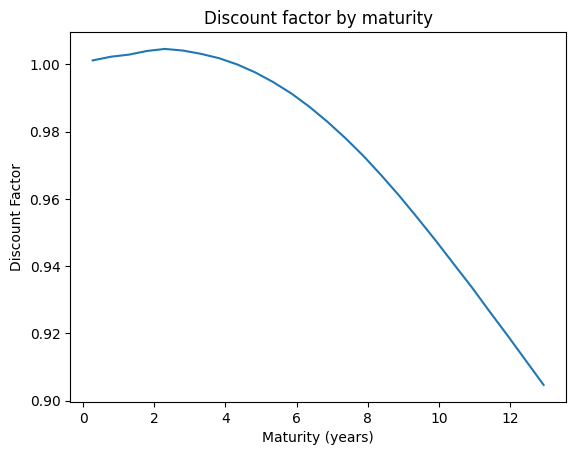

In [109]:
all_coupon_dates = floating_leg_coupon_dates[1:]
 
def get_discount_factors(yield_curve = yield_curve, payment_freq = 1):
    step = 1/2 #since floating has twice as many cashflows
    n_cashflows = len(all_coupon_dates) * step
 
    #time array / cashflow number
    t = np.arange(step, n_cashflows + step, step)
    r = yield_curve(t)/payment_freq
    return 1/((r + 1) ** t)
 
def plot_discount_factors(discount_factors):
    plt.figure();
    plt.plot(
        [count_years(settlement_date, d) for d in all_coupon_dates],
        discount_factors
    );
    plt.title('Discount factor by maturity');
    plt.xlabel('Maturity (years)');
    plt.ylabel('Discount Factor');
 
plot_discount_factors(get_discount_factors(yield_curve))

In [110]:
def get_fixed_leg_payments(rate):
    fixed_leg_cashflows = []
    coupon_dates = all_coupon_dates[1::2]
    discount_factors = get_discount_factors(yield_curve)[1::2]
    cashflows = discount_factors * rate * notional_value
    #specific cases
    cashflows[0] *= short_discount
    cashflows[-1] += (notional_value * discount_factors[-1])
    return cashflows

fixed_leg_cashflows = get_fixed_leg_payments(fixed_rate)
print(f"Fixed leg payments: {fixed_leg_cashflows}")
fixed_leg_cashflows = np.array(fixed_leg_cashflows)
fixed_leg_pv = fixed_leg_cashflows.sum()
print(f"Fixed leg PV: €{fixed_leg_pv}")

Fixed leg payments: [4.56331718e+03 6.00582874e+03 6.00653417e+03 5.99293456e+03
 5.96781570e+03 5.93026921e+03 5.88016086e+03 5.81937168e+03
 5.74808802e+03 5.66911891e+03 5.58580182e+03 5.49953870e+03
 9.05244813e+06]
Fixed leg PV: €9121116.907428492


In [111]:
print(f"Clean price: {round(fixed_leg_pv/notional_value * 100, 4)}")
print(f"Dirty price: {round((fixed_leg_pv+fixed_leg_ai)/notional_value * 100, 4)}")

Clean price: 91.2112
Dirty price: 91.225


In [112]:
def get_float_df(yield_curve = yield_curve):
    coupon_dates = all_coupon_dates
    discount_factors = get_discount_factors(yield_curve, 2)
 
    #compute forwards
    forward_rates = np.ones( len(coupon_dates) )
    for i in range( len(coupon_dates) - 1):
        forward_rates[i+1] = discount_factors[i]/discount_factors[i+1] - 1
    forward_rates[0] = -floating_rate
 
    cashflows = discount_factors * forward_rates * notional_value
    #specific cases
    cashflows[0] *= short_discount
    cashflows[-1] += (notional_value * discount_factors[-1])
 
    return pd.DataFrame(data = {
        'discount_factors' : discount_factors,
        'forward_rates': forward_rates,
        'discounted_cashflows': cashflows
    }, index = coupon_dates)
   
 
float_df = get_float_df(yield_curve)
float_df

,discount_factors,forward_rates,discounted_cashflows
"July 19th, 2019",1.000588,-0.002360,-1.797278e+04
"January 20th, 2020",1.001135,-0.000547,-5.475284e+03
"July 20th, 2020",1.001446,-0.000310,-3.106921e+03
"January 19th, 2021",1.001989,-0.000542,-5.426549e+03
"July 19th, 2021",1.002291,-0.000302,-3.026604e+03
"January 19th, 2022",1.002048,0.000243,2.435262e+03
"July 19th, 2022",1.001565,0.000482,4.829118e+03
"January 19th, 2023",1.000913,0.000651,6.515236e+03
"July 19th, 2023",1.000003,0.000911,9.107638e+03
"January 19th, 2024",0.998814,0.001191,1.189096e+04


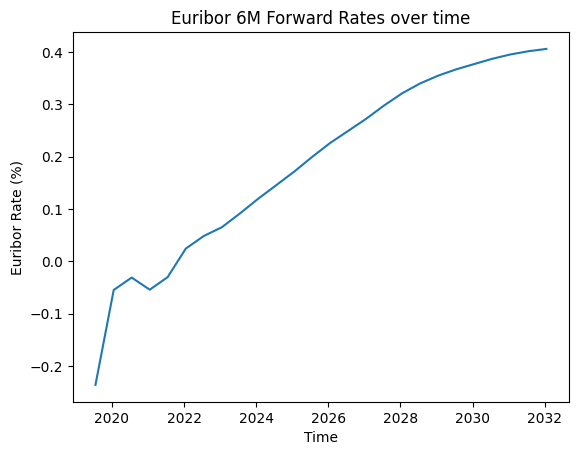

In [113]:
def plot_float_forward_rates(float_df):
    plt.title("Euribor 6M Forward Rates over time");
    plt.plot(
        [pd.Timestamp(dt.year(), dt.month(), dt.dayOfMonth()) for dt in float_df.index],
        float_df['forward_rates'] * 100
    );
    plt.xlabel('Time');
    plt.ylabel('Euribor Rate (%)');
 
plot_float_forward_rates(float_df)

In [114]:
floating_leg_pv = float_df.discounted_cashflows.sum()

print(f"Clean price: {round(floating_leg_pv/notional_value * 100, 4)}")
print(f"Dirty price: {round((floating_leg_pv+floating_leg_ai)/notional_value * 100, 4)}")

Clean price: 99.8791
Dirty price: 99.9335


In [115]:
swap_value = fixed_leg_pv-floating_leg_pv
print(f"Swap contract: €({swap_value})")

Swap contract: €(-866788.9024229925)


### d) Estimate the net present value of the contract.

In [116]:
# Net Present Value (NPV) of the contract
net_present_value = swap_value + floating_leg_ai + fixed_leg_ai
fixed_leg_npv = fixed_leg_pv + fixed_leg_ai
floating_leg_npv = floating_leg_pv + floating_leg_ai

print(f"Fixed Leg NPV: €{fixed_leg_npv}")
print(f"Floating Leg NPV: €{floating_leg_npv}")
print(f"Net Present Value (NPV) of the Contract: €{net_present_value}")


Fixed Leg NPV: €9122496.090761825
Floating Leg NPV: €9993346.920962596
Net Present Value (NPV) of the Contract: €-859968.607978548


### e) Estimate the swap par rate.

In [117]:
from scipy.optimize import fsolve

def find_swap_par_rate(fixed_rate):
    return sum(get_fixed_leg_payments(fixed_rate)) - floating_leg_pv

swap_par_rate = fsolve(find_swap_par_rate, 6/100)[0]

print(f"The swap par rate is {round(swap_par_rate*100, 4)}%")

The swap par rate is 0.7597%


### f) Estimate the following IRS Greeks: present value of a one basis point shift (PV01), DV01, Gamma and discuss the interest rate risk of the contract. 

In [126]:
def calculate_swap_pv(fixed_rate, basis_point=0.0):
    if basis_point != 0.0:
        yield_curve_shifted = CubicSpline(yield_curve_df.theta, yield_curve_df.rate + basis_point, bc_type='not-a-knot')
    else:
        yield_curve_shifted = yield_curve
    
    fixed_leg_payments = get_fixed_leg_payments(fixed_rate, yield_curve_shifted)
    
    fixed_leg_pv = np.sum(fixed_leg_payments)
    
    floating_leg_pv = float_df.discounted_cashflows.sum()
    
    swap_pv = fixed_leg_pv - floating_leg_pv
    
    return swap_pv

def calculate_pv01(fixed_rate, basis_point=0.0001):
    pv_original = calculate_swap_pv(fixed_rate)
    
    pv_shifted = calculate_swap_pv(fixed_rate + basis_point)
    
    return pv_shifted - pv_original

def calculate_dv01(fixed_rate, basis_point=0.0001):
    pv_original = calculate_swap_pv(fixed_rate)
    
    pv_shifted = calculate_swap_pv(fixed_rate, basis_point)
    
    return pv_original - pv_shifted

def calculate_gamma(fixed_rate, basis_point=0.0001):
    pv01_original = calculate_pv01(fixed_rate, basis_point)
    
    pv01_shifted_higher = calculate_pv01(fixed_rate + basis_point, basis_point)
    
    pv01_shifted_lower = calculate_pv01(fixed_rate - basis_point, basis_point)
    
    return (pv01_shifted_higher - 2 * pv01_original + pv01_shifted_lower) / (basis_point ** 2)

fixed_rate = swap_par_rate  
pv01 = calculate_pv01(fixed_rate)
dv01 = calculate_dv01(fixed_rate)
gamma = calculate_gamma(fixed_rate)

print(f"PV01: {pv01}")
print(f"DV01: {dv01}")
print(f"Gamma: {gamma}")


PV01: 12383.937914442271
DV01: 12317.49760125205
Gamma: 0.0
